# Geather

In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import requests
import os
import re
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name=''
response = requests.get(url)
with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as image_predictions:
        image_predictions.write(response.content)
        
        
df= pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [2]:
df_list = []
tweet_list=[]

In [3]:
file= ('tweet-json.txt')

In [4]:
    with open(file) as file:
            for line in file:
                tweet = json.loads(line)
                tweet_list.append(tweet)

In [5]:
      for tweet in tweet_list:        
                tweet_id=tweet['id_str']
                retweet_count=tweet['retweet_count']
                favorite_count=tweet['favorite_count']
                df_list.append({'tweet_id': tweet_id,
                               'retweet_count': int(retweet_count),
                               'favorite_count': int(favorite_count)})
df_twitter = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


# Assess

#### Exploring data types in twitter archive 

In [6]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

#### How many tweets we have ??

In [7]:
len(df['tweet_id'])

2356

#### Visual Assessment

In [8]:
df_twitter.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [10]:
df_twitter.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [11]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Programmic Assessment

#### in the below lines we will demonstrate a function to detect  missing , duplicate , and non usual values in the 3 Data sets to 

In [17]:
import scipy as sp
import numpy as np


In [18]:
for column in df_twitter :
    print("{} {} {} {}".format(df_twitter[column].name , df_twitter[column].duplicated().sum() , df_twitter[column].isnull().sum(), np.dtype(df_twitter[column])))


tweet_id 0 0 object
retweet_count 630 0 int64
favorite_count 347 0 int64


In [19]:
for column in image_predictions :
    print("{} {} {} {}".format(image_predictions[column].name , image_predictions[column].duplicated().sum() , image_predictions[column].isnull().sum(), np.dtype(image_predictions[column])))


tweet_id 0 0 int64
jpg_url 66 0 object
img_num 2071 0 int64
p1 1697 0 object
p1_conf 69 0 float64
p1_dog 2073 0 bool
p2 1670 0 object
p2_conf 71 0 float64
p2_dog 2073 0 bool
p3 1667 0 object
p3_conf 69 0 float64
p3_dog 2073 0 bool


In [20]:
#a 

for column in df :
    print("{} {} {} {}".format(df[column].name , df[column].duplicated().sum() , df[column].isnull().sum(), np.dtype(df[column])))


tweet_id 0 0 int64
in_reply_to_status_id 2278 2278 float64
in_reply_to_user_id 2324 2278 float64
timestamp 0 0 object
source 2352 0 object
text 0 0 object
retweeted_status_id 2174 2175 float64
retweeted_status_user_id 2330 2175 float64
retweeted_status_timestamp 2174 2175 object
expanded_urls 137 59 object
rating_numerator 2316 0 int64
rating_denominator 2338 0 int64
name 1399 0 object
doggo 2354 0 object
floofer 2354 0 object
pupper 2354 0 object
puppo 2354 0 object


In [21]:
TT={}
for column in df:
    print(df[column].name)
    print (df[column].value_counts())
    print(len(df[column]))

tweet_id
749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [22]:
for column in df:
    print(df[column].name)
    print(len(df[column]))

tweet_id
2356
in_reply_to_status_id
2356
in_reply_to_user_id
2356
timestamp
2356
source
2356
text
2356
retweeted_status_id
2356
retweeted_status_user_id
2356
retweeted_status_timestamp
2356
expanded_urls
2356
rating_numerator
2356
rating_denominator
2356
name
2356
doggo
2356
floofer
2356
pupper
2356
puppo
2356


In [23]:
for column in image_predictions:
    print(image_predictions[column].name)
    print (image_predictions[column].value_counts())
    print(len(image_predictions[column]))

tweet_id
685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556

Name: p2, Length: 405, dtype: int64
2075
p2_conf
0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64
2075
p2_dog
True     1553
False     522
Name: p2_dog, d

#### ISSUES DETECTED

Actually from the recently runned frequencies and descriptive statistics we can detect several quality issues



#### Quality 

1-Tweets with no images as we see length of image_predictions is 2075 and length of image url is 2009

2-Dataset contains retweets and mentioned in project motivation that we need only tweets

3- un clear letters in text

4- Incorrect dog names like "a" which is found 55 times as a name of a dog

5- dogs named as None however they can be named from tweet text as we will prove later and the same for stages and rates

6-Missing values in 'name' and dog stages showing as 'None'

7-The numerator and denominator columns have unusual values like"1776 " and "666"

8- some cases have rating like that "11/15/15" with several numerators

9-Tweet ID : 810984652412424192 doesn't contain a rating only (24/7) in text which is not rating

10- datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id) especially date which may be important later (other variables are objects or strings) 



#### Tidiness 
1- Dog "stages: doggo, floofer, pupper, puppo while they should be in a single column as will be later

2- we should have an only one data set so we will join 'tweet_info' and 'image_predictions' to 'df'

3 - rating of dog in 2 vaariables instead of one 

# Clean

#### Making a copy of data to run cleaning steps on

In [24]:
df_1 = df.copy()
image_predictions_1 = image_predictions.copy()
df_twitter_1= df_twitter.copy()

###### Then , we split text to ease extracting needed data from it 

In [25]:
J1=[]

In [26]:
##first we split text to recognize values of each word or number (using // to split to avoid hyperlinks)
for f in df_1['text']:
    j1=re.split(' |//|\n',f)
    J1.append(j1)

In [27]:
len(J1[0])

19

In [28]:
J1[0]

['This',
 'is',
 'Phineas.',
 "He's",
 'a',
 'mystical',
 'boy.',
 'Only',
 'ever',
 'appears',
 'in',
 'the',
 'hole',
 'of',
 'a',
 'donut.',
 '13/10',
 'https:',
 't.co/MgUWQ76dJU']

In [29]:

df_1['text_split']=J1


Checking that new text variable was joined to data

In [30]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_split
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"[This, is, Phineas., He's, a, mystical, boy., ..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"[This, is, Tilly., She's, just, checking, pup,..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,"[This, is, Archie., He, is, a, rare, Norwegian..."
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,"[This, is, Darla., She, commenced, a, snooze, ..."
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,"[This, is, Franklin., He, would, like, you, to..."


### Incorrect variables types

###### Define

###### Twitter_archive_enhanced: Wrong data type for date variable

###### CODE

In [31]:
##solving issue of bad type for date variable (Quality issue 10)
from datetime import datetime
import time

In [32]:
datetime.strptime((df_1['timestamp'][0][:10]), "%Y-%m-%d").date()
J5=[]
for f in range(len(df_1['timestamp'])):
    j1=datetime.strptime((df_1['timestamp'][f][:10]), "%Y-%m-%d").date()
    J5.append(j1)
    



In [33]:
df_1['dates']=J5

In [34]:
df_1['dates']=df_1['dates'].astype(datetime)

###### Test

In [35]:
#let's see how date is expressed now 
df_1['dates'].head()

0    2017-08-01
1    2017-08-01
2    2017-07-31
3    2017-07-30
4    2017-07-29
Name: dates, dtype: object

In [36]:
df_1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
text_split                     object
dates                          object
dtype: object

#### Extracting variables like dof phase , rating , and name via NLTK package


In [37]:
##importing package and its required dictionnaries
import nltk
from nltk.corpus import wordnet 
from nltk.tree import Tree
from nltk.chunk import ne_chunk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [38]:
# an example of how the data are splitted by type in nltk.pos_tag method
nltk.pos_tag(df_1['text_split'][9])

[('This', 'DT'),
 ('is', 'VBZ'),
 ('Cassie.', 'NNP'),
 ('She', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('college', 'NN'),
 ('pup.', 'NN'),
 ('Studying', 'NNP'),
 ('international', 'JJ'),
 ('doggo', 'NN'),
 ('communication', 'NN'),
 ('and', 'CC'),
 ('stick', 'JJ'),
 ('theory.', 'NN'),
 ('14/10', 'CD'),
 ('so', 'RB'),
 ('elegant', 'JJ'),
 ('much', 'JJ'),
 ('sophisticate', 'NN'),
 ('https:', 'NN'),
 ('t.co/t1bfwz5S2A', 'NN')]

### Missing and incorrect data

### Twitter_archive_enhanced : Wrong and missing Dogs names

###### Define : mis-specified dogs names

###### Define : wrongly missing dogs names

##### Code

In [39]:
# the idea here is generally the name is often the first name in the tweet 
# so we take the first "NNP" in the "text_split" variable 
# but some other values that are not names may appear so we exclude them first
#since NNP's are chosen as the words contain the first letter upper case 
from nltk import word_tokenize, pos_tag, pos_tag_sents
q= df_1['text'].str.replace('@'," ")
q= q.str.replace('RT'," ")
q= q.str.replace('Please'," ")
q= q.str.replace('Meet'," ")
q= q.str.replace('H*ckin'," ")
q= q.str.replace('Did'," ")
q= q.str.replace('Doc'," ")
q= q.str.replace('Guys'," ")
q= q.str.replace('Must'," ")
q= q.str.replace('TheEllenShow'," ")
q= q.str.replace('Bo'," ")
q= q.str.replace('Say'," ")
q= q.str.replace('Thank'," ")
q= q.str.replace('First'," ")
q= q.str.replace('Christmas'," ")
q= q.str.replace('Very'," ")
              
texts = q.tolist()
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
tagged_texts

[[('This', 'DT'),
  ('is', 'VBZ'),
  ('Phineas', 'NNP'),
  ('.', '.'),
  ('He', 'PRP'),
  ("'s", 'VBZ'),
  ('a', 'DT'),
  ('mystical', 'JJ'),
  ('boy', 'NN'),
  ('.', '.'),
  ('Only', 'RB'),
  ('ever', 'RB'),
  ('appears', 'VBZ'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('hole', 'NN'),
  ('of', 'IN'),
  ('a', 'DT'),
  ('donut', 'NN'),
  ('.', '.'),
  ('13/10', 'CD'),
  ('https', 'NN'),
  (':', ':'),
  ('//t.co/MgUWQ76dJU', 'NN')],
 [('This', 'DT'),
  ('is', 'VBZ'),
  ('Tilly', 'RB'),
  ('.', '.'),
  ('She', 'PRP'),
  ("'s", 'VBZ'),
  ('just', 'RB'),
  ('che', 'VBN'),
  ('g', 'JJ'),
  ('pup', 'NN'),
  ('on', 'IN'),
  ('you', 'PRP'),
  ('.', '.'),
  ('Hopes', 'VBZ'),
  ('you', 'PRP'),
  ("'re", 'VBP'),
  ('doing', 'VBG'),
  ('ok', 'NN'),
  ('.', '.'),
  ('If', 'IN'),
  ('not', 'RB'),
  (',', ','),
  ('she', 'PRP'),
  ("'s", 'VBZ'),
  ('available', 'JJ'),
  ('for', 'IN'),
  ('pats', 'NNS'),
  (',', ','),
  ('snugs', 'NNS'),
  (',', ','),
  ('boops', 'NNS'),
  (',', ','),
  ('the', 'DT'),
  ('w

In [40]:
#we merge that new variable to the data
df_1['POS'] = tagged_texts

In [41]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_split,dates,POS
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"[This, is, Phineas., He's, a, mystical, boy., ...",2017-08-01,"[(This, DT), (is, VBZ), (Phineas, NNP), (., .)..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"[This, is, Tilly., She's, just, checking, pup,...",2017-08-01,"[(This, DT), (is, VBZ), (Tilly, RB), (., .), (..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,"[This, is, Archie., He, is, a, rare, Norwegian...",2017-07-31,"[(This, DT), (is, VBZ), (Archie, NNP), (., .),..."
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,"[This, is, Darla., She, commenced, a, snooze, ...",2017-07-30,"[(This, DT), (is, VBZ), (Darla, NNP), (., .), ..."
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,"[This, is, Franklin., He, would, like, you, to...",2017-07-29,"[(This, DT), (is, VBZ), (Franklin, NNP), (., ...."


In [42]:
###Next we extract the first NNP tagged expression as dog name

In [43]:
J2=[]

In [44]:
from itertools import islice
df_1['POS'][2][2][1]
len (tagged_texts)
tagged_texts  [3]    
is_noun = lambda pos: pos[:2] == 'NNP'
nouns = [word for (word, pos) in tagged_texts [2] if pos== 'NNP'] #as an example

In [45]:
#in this example the first NNp is dog's name 
nouns

['Archie', 'Pouncing', 'Corgo']

In [46]:
for i in range(len(tagged_texts)):
    nouns = [word for (word, pos) in tagged_texts [i] if pos== 'NNP'] 
    J2.append(nouns)

In [47]:
#we remove duplicates first from each row's text array
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

In [48]:
for i in range(len(J2)):
    J2[i]=Remove(J2[i])

In [49]:
# we may find sentenses written all words in upper case so they are considered NNPs this way since , as m
#mentioned before NNP's are chosen as the words contain the first letter upper case 
for i in range(len(J2)):
    if len(J2[i])> 4:
           J2[i]=[0]

In [50]:
# finally we take the first NNP as dog's name
for i in range(len(J2)):
    if len(J2[i])==0:
           J2[i]=[0]

In [51]:
len(J2)

2356

In [52]:
J4=[]
for i in range (len(J2)):
    d=J2[i][0]
    J4.append(d)

    


In [53]:
#to make sure.......
J2[3][0]

'Darla'

In [54]:
#merging new names to data 
df_1['Name_dog']=J4

###### Test

In [55]:
##new names after extraction
df_1['Name_dog'].value_counts()


0          517
Cooper      12
Oliver      12
Charlie     12
Lucy        11
Pls         11
Lola        10
Penny       10
Tucker       9
Winston      9
Jack         8
Toby         8
Sadie        8
Bailey       7
Buddy        7
Daisy        7
Koda         6
Oscar        6
Jax          6
Rusty        6
Stanley      6
Louis        6
Milo         6
Dave         6
Scout        6
Leo          6
Finn         5
Phil         5
Dog          5
Super        5
          ... 
Carper       1
Wiggles      1
Diogi        1
Comet        1
Bloo         1
Clyde        1
Severus      1
Clarq        1
Twips        1
Emma         1
Human        1
Ma'am        1
Swagger      1
Lorelei      1
Doobert      1
Stormy       1
Koko         1
Jameson      1
Arctic       1
Jeb          1
Blakely      1
Striped      1
Dutch        1
Olaf         1
Murphy       1
Oreo         1
Quite        1
Laika        1
Blipson      1
Mabel        1
Name: Name_dog, Length: 1200, dtype: int64

In [56]:
#names before extraction
df_1['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
an             7
Buddy          7
Toby           7
Koda           6
Jack           6
Scout          6
Stanley        6
Rusty          6
Dave           6
Leo            6
Oscar          6
Milo           6
Jax            6
Bella          6
Sunny          5
            ... 
Cal            1
Tanner         1
Snoopy         1
Huxley         1
Eazy           1
Kobe           1
Scruffers      1
Maisey         1
Lacy           1
Monster        1
all            1
Dutch          1
Olaf           1
Murphy         1
Cupid          1
Tuco           1
Goliath        1
Laika          1
Bode           1
Wiggles        1
Norman         1
Hanz           1
Tuck           1
DayZ           1
Beemo          1
Ember          1
Trigger        1
Jazz          

#### from Test comparison we see the following:
1- a, an the ,my and such non names expressions not found here 

2- zeros or missing values with no names are in the new variable 517 only while before were 745

### Twitter_archive_enhanced :  Wrong dogs' ratings 
### Twitter_archive_enhanced : Tidiness :Ratings in 2 variables instead of 1


#### Define

#####  Wrong  dogs' ratings
#####  Dogs' ratings in 2 columns instead of 1

##### CODE

In [57]:
# using the same way to find correct ratings 
# all numerical expression have the tag cd so we extract all text so tagged and then clean them

q= df_1['text'].str.replace('@'," ")
q= q.str.replace('RT'," ")
q= q.str.replace('Please'," ")
q= q.str.replace('Meet'," ")
q= q.str.replace('H*ckin'," ")
q= q.str.replace('Did'," ")
q= q.str.replace('Doc'," ")
q= q.str.replace('Guys'," ")
q= q.str.replace('Must'," ")
q= q.str.replace('TheEllenShow'," ")
q= q.str.replace('Bo'," ")
q= q.str.replace('Say'," ")
q= q.str.replace(r'[^\d\d/\d\d]'," ")
q= q.str.replace(r'//|/ '," ")
texts = q.tolist()
tagged_texts1 = pos_tag_sents(map(word_tokenize, texts))
tagged_texts1

[[('13/10', 'CD'), ('76', 'CD')],
 [('13/10', 'CD'), ('/0', 'CD'), ('71', 'CD')],
 [('12/10', 'CD')],
 [('13/10', 'CD'), ('36', 'CD'), ('7', 'CD')],
 [('12/10', 'CD'), ('91', 'CD'), ('7', 'CD')],
 [('13/10', 'CD'), ('04', 'CD')],
 [('13/10', 'CD'), ('4', 'CD'), ('1', 'CD')],
 [('13/10', 'CD'), ('0', 'CD')],
 [('13/10', 'CD'), ('/9', 'CD'), ('0', 'CD')],
 [('14/10', 'CD'), ('1', 'CD'), ('5', 'CD'), ('2', 'CD')],
 [('13/10', 'CD'), ('0', 'CD'), ('0', 'CD')],
 [('13/10', 'CD'), ('1', 'CD'), ('29', 'CD')],
 [('13/10', 'CD'), ('0', 'CD')],
 [('12/10', 'CD'), ('8', 'CD')],
 [('13/10', 'CD'), ('70', 'CD'), ('6', 'CD'), ('3', 'CD')],
 [('13/10', 'CD')],
 [('12/10', 'CD')],
 [('13/10', 'CD'), ('77', 'CD'), ('5', 'CD')],
 [('13/10', 'CD')],
 [('13/10', 'CD')],
 [('12/10', 'CD'), ('7', 'CD')],
 [('13/10', 'CD'), ('20', 'CD'), ('64', 'CD')],
 [('14/10', 'CD'), ('/20', 'CD'), ('8', 'CD')],
 [('13/10', 'CD')],
 [('13/10', 'CD')],
 [('12/10', 'CD'), ('/4', 'CD'), ('1', 'CD')],
 [('13/10', 'CD'), ('6'

In [58]:
# as we see above we extracted all texts that are numeric or may refer to a number like value 
# so we may have several values per case and we choose the correct rating of them as follows
## we make a separate dataframe for number like values
J3=[]
for i in range(len(tagged_texts1)):
    nouns = [word for (word, pos) in tagged_texts1 [i] if pos== 'CD'] 
    J3.append(nouns)


df = pd.DataFrame( (v for v in J3),columns=['score','na','nq','n3','f2','r','y'] )



In [59]:
# we first exclude columns that have no values like rating (we marked them by #)
df.y.value_counts()#
df.r.value_counts()#
df.f2.value_counts()
df.n3.value_counts()#
df.nq.value_counts()
df.na.value_counts()

# 
df['na']=np.where((df.na.str.contains('./', regex=True)),df['na'],0)
df['score']=np.where((df.score.str.contains('./', regex=True)),df['score'],0)
df['nq']=np.where((df.nq.str.contains('./', regex=True)),df['nq'],0)
df['f2']=np.where((df.f2.str.contains('./', regex=True)),df['f2'],0)

In [60]:
# to check that functions before work
df['na'].value_counts()

0         2238
11/10       26
10/10       19
13/10       12
12/10       11
7/10         9
9/10         8
8/10         6
14/10        6
1/10         4
5/10         4
4/10         3
75/10        2
2/10         2
99/90        1
27/10        1
1/2          1
666/10       1
6/10         1
26/10        1
Name: na, dtype: int64

In [61]:
##### Detect : dogs' ratings in 2 variables instead of 1 


###### Code

###### then we accumelate ratings in a single columns as follows 

In [62]:
df['score']=np.where((df['na']==0),df['score'],df['na'])
df['score']=np.where((df['nq']==0),df['score'],df['nq'])
df['score']=np.where((df['f2']==0),df['score'],df['f2'])

In [63]:
len(df['score'])

2356

In [64]:
##we merge new scores to our data

In [65]:
df_1['new_score']=df['score']

##### TEST

In [66]:
df_1['new_score'].value_counts()

12/10       557
11/10       466
10/10       454
13/10       355
9/10        156
8/10        104
14/10        56
7/10         55
5/10         36
6/10         33
3/10         19
4/10         16
2/10         10
1/10          9
420/10        2
0/10          2
75/10         2
15/10         2
666/10        1
26/10         1
20/16         1
1776/10       1
84/70         1
88/80         1
121/110       1
4/20          1
11/15/15      1
24/7          1
165/150       1
45/50         1
80/80         1
27/10         1
44/40         1
60/50         1
99/90         1
144/120       1
204/170       1
182/10        1
143/130       1
007/10        1
Name: new_score, dtype: int64

###### unfortunaltely the same problematic values are found 1776/10 and 11/15/15
###### but generally these rates are more acceptable and all texts have rating and also more accurate
###### i.e old rating considered 7/10 rating 55 times as here but did not include 007 value like i did
##### as for tidiness rating as seen became in one variable 

### Twitter_archive_enhanced : missing and wrongly specified dogs stages

##### Define

####  missing and wrongly specified dogs stages

#### Code

In [67]:
#additional stages of 
#belp snoot  are not found here
# we work on the four available stages 
# we here work using the text splitted  by space ,'/n' and '//' (text_split) variable

In [68]:
##first we take all texts contain'doggo' ignoring case 
import re
matches=[]
regex = re.compile('doggo',re.IGNORECASE)
for i in range(len(df_1['text_split'])):
    l= df_1['text_split'][i]
    match = [string for string in l if re.match(regex, string)]
    matches.append(match)


In [69]:
len(matches)

2356

In [70]:
##we then check if more than a value in the same text and which is right??, making a a dataframe for the newly
#generated doggo values
df0=pd.DataFrame(matches,columns=['doggo','na'])

In [71]:
##checking doggo values
df0['doggo'].value_counts()

doggo      63
doggo.     17
doggos      8
Doggo.      5
Doggo       4
doggo,      3
doggos.     2
DOGGO       1
Name: doggo, dtype: int64

In [72]:
df0=df0.drop(['na'], axis=1)

In [73]:
#then we merge newly generated variable of doggo to our data

df_1['dog1']=df0

#### then perform the same steps for other dog stages


In [74]:


import re
matches=[]
regex = re.compile('floofer',re.IGNORECASE)
for i in range(len(df_1['text_split'])):
    l= df_1['text_split'][i]
    match = [string for string in l if re.match(regex, string)]
    matches.append(match)


In [75]:
df_1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [76]:
#some mis specifications as in this case 

In [77]:
len(matches)
df1=pd.DataFrame(matches,columns=['floofer'])
df1['floofer'].value_counts()


Floofer.    4
floofer     3
Floofer     2
floofer.    1
Name: floofer, dtype: int64

In [78]:
import re
matches=[]
regex = re.compile('pupper',re.IGNORECASE)
for i in range(len(df_1['text_split'])):
    l= df_1['text_split'][i]
    match = [string for string in l if re.match(regex, string)]
    matches.append(match)

    

In [79]:
len(matches)
df2=pd.DataFrame(matches,columns=['pupper','p1','p2'])
df2['pupper'].value_counts()
df2['p1'].value_counts()
df2['p2'].value_counts()


pupper    1
Name: p2, dtype: int64

In [80]:
df2['pupper']=np.where((df2['p1'].isnull()),df2['pupper'],df2['p1'])

In [81]:
df2['pupper']=np.where((df2['p2'].isnull()),df2['pupper'],df2['p2'])

In [82]:
df2=df2.drop(['p1','p2'], axis=1)

In [83]:
import re
matches=[]
regex = re.compile('puppo',re.IGNORECASE)
for i in range(len(df_1['text_split'])):
    l= df_1['text_split'][i]
    match = [string for string in l if re.match(regex, string)]
    matches.append(match)

In [84]:
len(matches)
df3=pd.DataFrame(matches,columns=['puppo','p1'])
df3['puppo'].value_counts()
df3['p1'].value_counts()

Puppollock.    1
Name: p1, dtype: int64

In [85]:
df3['puppo']=np.where((df3['p1'].isnull()),df3['puppo'],df3['p1'])

In [86]:
df3['puppo'].value_counts()

puppo          17
puppo.         11
pupposes.       1
puppo?          1
puppos          1
puppologize     1
Puppollock.     1
puppoccino.     1
pupporazzi.     1
Name: puppo, dtype: int64

In [87]:
df3=df3.drop(['p1'], axis=1)
df_1['dog4']=df3

##### Test

##### Test1

In [88]:
ddd=df_1.loc[df_1.doggo=='doggo',['dog1','text','tweet_id']]

In [89]:
## we take cases that are doggo but not specified as doggo in the old variable

ddf=df_1.loc[(df_1.dog1.isnull()==0),['dog1','text','text_split','tweet_id','doggo']][df_1.doggo=='None']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
#demonstrating the improvement in specification

ddf

,dog1,text,text_split,tweet_id,doggo
83,doggos,I can say with the pupmost confidence that the...,"[I, can, say, with, the, pupmost, confidence, ...",876537666061221889,None
268,doggos,Here we have some incredible doggos for #K9Vet...,"[Here, we, have, some, incredible, doggos, for...",841439858740625411,None
302,doggos,RT @SchafeBacon2016: @dog_rates Slightly distu...,"[RT, @SchafeBacon2016:, @dog_rates, Slightly, ...",836648853927522308,None
475,doggos,RT @dog_rates: Meet Jack. He's one of the rare...,"[RT, @dog_rates:, Meet, Jack., He's, one, of, ...",816062466425819140,None
477,doggos,Meet Jack. He's one of the rare doggos that do...,"[Meet, Jack., He's, one, of, the, rare, doggos...",815990720817401858,None
798,doggos,You need to watch these two doggos argue throu...,"[You, need, to, watch, these, two, doggos, arg...",772877495989305348,None
934,doggos.,Here we are witnessing an isolated squad of bo...,"[Here, we, are, witnessing, an, isolated, squa...",753420520834629632,None
946,doggos,Here are three doggos completely misjudging an...,"[Here, are, three, doggos, completely, misjudg...",752568224206688256,None
987,doggos,This is Dietrich. He hops at random. Other dog...,"[This, is, Dietrich., He, hops, at, random., O...",749036806121881602,None
1120,doggos.,Say hello to this unbelievably well behaved sq...,"[Say, hello, to, this, unbelievably, well, beh...",731156023742988288,None


##### From the test we find improvement in specifying that several cases were not specified of stage "doggo" despite they are
 

In [91]:
df_1['dog2']=df1
ddd1=df_1.loc[df_1.floofer=='floofer',['dog2','text','tweet_id']]
ddf1=df_1.loc[(df_1.dog2.isnull()==0),['dog2','text','text_split','tweet_id','floofer']][df_1.floofer=='None']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
##the 10 cases floffer are rightl specified in the before data

##### TEST2

In [93]:
ddf1

,dog2,text,text_split,tweet_id,floofer


##### Test 3 

In [94]:
df_1['dog3']=df2
ddd2=df_1.loc[df_1.pupper=='pupper',['dog3','text','tweet_id']]
ddf2=df_1.loc[(df_1.dog3.isnull()==0),['dog3','text','text_split','tweet_id','pupper']][df_1.pupper=='None']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
ddf2

,dog3,text,text_split,tweet_id,pupper
54,puppertunity,This is Gary. He couldn't miss this puppertuni...,"[This, is, Gary., He, couldn't, miss, this, pu...",881666595344535552,None
536,Pupperdoop.,This is Lennon. He's a Boopershnoop Pupperdoop...,"[This, is, Lennon., He's, a, Boopershnoop, Pup...",807010152071229440,None
993,puppers,This is one of the most reckless puppers I've ...,"[This, is, one, of, the, most, reckless, puppe...",748575535303884801,None
1027,puppers,This is Arlen and Thumpelina. They are best pa...,"[This, is, Arlen, and, Thumpelina., They, are,...",746056683365994496,None
1093,puppers,Everybody stop what you're doing and watch the...,"[Everybody, stop, what, you're, doing, and, wa...",737310737551491075,None
1220,puppers.,Here are two lil cuddly puppers. Both 12/10 wo...,"[Here, are, two, lil, cuddly, puppers., Both, ...",714606013974974464,None
1228,puppers,Happy Saturday here's 9 puppers on a bench. 99...,"[Happy, Saturday, here's, 9, puppers, on, a, b...",713900603437621249,None
1254,puppers.,Here's a brigade of puppers. All look very pre...,"[Here's, a, brigade, of, puppers., All, look, ...",710658690886586372,None
1351,puppers.,Here is a whole flock of puppers. 60/50 I'll ...,"[Here, is, a, whole, flock, of, puppers., , 60...",704054845121142784,None
1634,puppers,"Two sneaky puppers were not initially seen, mo...","[Two, sneaky, puppers, were, not, initially, s...",684225744407494656,None


##### we see alot of cases not considered as puppers despite they should have been and the improvement in specification

##### Test 4 

In [96]:

ddd3=df_1.loc[df_1.pupper=='puppo',['dog4','text','tweet_id']]
ddf3=df_1.loc[(df_1.dog4.isnull()==0),['dog4','text','text_split','tweet_id','puppo']][df_1.puppo=='None']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
ddf3

,dog4,text,text_split,tweet_id,puppo
85,puppoccino.,"Meet Venti, a seemingly caffeinated puppoccino...","[Meet, Venti,, a, seemingly, caffeinated, pupp...",876120275196170240,None
134,puppologize,This is Lili. She can't believe you betrayed h...,"[This, is, Lili., She, can't, believe, you, be...",866686824827068416,None
172,Puppollock.,I have stumbled puppon a doggo painting party....,"[I, have, stumbled, puppon, a, doggo, painting...",858843525470990336,None
274,puppos,@0_kelvin_0 &gt;10/10 is reserved for puppos s...,"[@0_kelvin_0, &gt;10/10, is, reserved, for, pu...",840698636975636481,None
296,pupposes.,This is Lucy. She has a portrait of herself on...,"[This, is, Lucy., She, has, a, portrait, of, h...",837366284874571778,None
545,pupporazzi.,This is Duke. He is not a fan of the pupporazz...,"[This, is, Duke., He, is, not, a, fan, of, the...",805826884734976000,None


### "Twitter_archive_enhanced":tidiness issue dog stages in 4 variables not one variable

##### Define

##### tidiness issue dog stages in 4 variables not one variable

##### Code

In [98]:
# then we merge all dog phases values in a single columns solving the first tidiness issue
# ssssss is considered as missing value

In [99]:
df_1['dog_type_final']='ssssss'
df_1['dog_type_final']=np.where(((df_1['dog1'].isnull()==0) & (df_1['dog_type_final']=='ssssss')),'doggo',df_1['dog_type_final'])
df_1['dog_type_final']=np.where(((df_1['dog2'].isnull()==0) & (df_1['dog_type_final']=='ssssss')),'floofer',df_1['dog_type_final'])
df_1['dog_type_final']=np.where(((df_1['dog3'].isnull()==0) & (df_1['dog_type_final']=='ssssss')),'pupper',df_1['dog_type_final'])
df_1['dog_type_final']=np.where(((df_1['dog4'].isnull()==0) & (df_1['dog_type_final']=='ssssss')),'puppo',df_1['dog_type_final'])

##### Test

In [100]:
df_1['dog_type_final'].value_counts()

ssssss     1943
pupper      268
doggo       103
puppo        33
floofer       9
Name: dog_type_final, dtype: int64

###### we find ssssss meaning missing dog phases of all are lesser indicating better specification than
######  before and floofer are 9 instead of 10 indicating that there is another stage in the phase

### before we proceed more we have to make data less crowded by dropping some unneeded variables

##### Drop Junk variables and we drop old  names , stages , and rates that were cleaned 

In [101]:
#let's see variables now
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
text_split                    23

##### Code

##### first we drop old  names , stages , and rates that were cleaned 

In [102]:
#we find our data full of junk variables let's drop them 
df_=df_1.drop(['timestamp','rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper' ,'puppo', 'text_split', 'dates' ,'POS','dog1','dog2','dog3','dog4'], axis=1)

###### Test

In [103]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
Name_dog                      2356 non-null object
new_score                     2356 non-null object
dog_type_final                2356 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 221.0+ KB


### "Twitter_archive_enhanced" : we have retweets despite we want only to analyze original tweets

##### Define

##### we have retweets despite we want only to analyze original tweets

##### Code

#####  drop retweets

In [104]:
#we then drop tweets that are retweets 
df_ = df_.drop(df_[(df_['retweeted_status_id'].isnull()==0)].index)

In [105]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
Name_dog                      2175 non-null object
new_score                     2175 non-null object
dog_type_final                2175 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 220.9+ KB


#####  Drop variables talking about retweting statistics (off course junk variables not needed)

In [106]:
# Then drop variables that are about retweeting statistics 
df_=df_.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

##### Test

In [107]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
Name_dog                 2175 non-null object
new_score                2175 non-null object
dog_type_final           2175 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 169.9+ KB


### "Twitter_archive_enhanced","Image_predictions","df_twitter": we drop old  names , stages , and rates that were cleaned 

##### Define

#####  we should have an only one data set so we will join 'tweet_info' and 'image_predictions' to 'df_1'

##### Code

In [108]:
##finally merging retweets and predictions 

In [109]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [110]:
df_twitter_1['tweet_id']=df_twitter_1['tweet_id'].astype(int)


In [111]:
df_merge = df_.merge(df_twitter_1, left_on = 'tweet_id',right_on = 'tweet_id',how = 'left')

In [112]:
df_merge = df_merge.merge(image_predictions_1, left_on = 'tweet_id',right_on = 'tweet_id',how = 'left')

##### Test

In [113]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
Name_dog                 2175 non-null object
new_score                2175 non-null object
dog_type_final           2175 non-null object
retweet_count            2175 non-null int64
favorite_count           2175 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                   

##### saving  resulting data to csv

In [114]:
df_merge.to_csv('twitter_archive_master.csv.', index=True)


In [115]:
## Finally we have the final cleaned data so we get to have insights on it
# first we calculate the determinator and numinator separately and divide them to have an absoulute score to compare evaluations with 


## Activity of insights and plot

In [116]:
#since we don't have the same reting numerator so we have to divide determinator by numerator to have an absolute score to use in comparison

In [117]:
J6=[]
for i in range(len(df_merge['new_score'])):
    f=df_merge['new_score'][i][:-3]
    J6.append(f)

In [118]:
df_merge['rating_det']=J6

In [119]:
df_merge['rating_det']=df_merge['rating_det'].replace('11/15','15')

In [120]:
df_merge['rating_det'].value_counts()

12      500
10      435
11      426
13      311
9       155
8       101
7        54
14       44
5        35
6        33
3        19
4        17
2        11
1         8
0         2
420       2
15        2
75        1
007       1
144/      1
27        1
26        1
80        1
121/      1
44        1
88        1
666       1
84        1
45        1
204/      1
165/      1
1776      1
143/      1
60        1
20        1
182       1
99        1
Name: rating_det, dtype: int64

In [121]:
df_merge['rating_det']=df_merge['rating_det'].str.strip('/').astype(int)

In [122]:
df_merge['rating_det'].value_counts()

12      500
10      435
11      426
13      311
9       155
8       101
7        55
14       44
5        35
6        33
3        19
4        17
2        11
1         8
420       2
0         2
15        2
80        1
20        1
26        1
44        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
1776      1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_det, dtype: int64

In [123]:
J7=[]
for i in range(len(df_merge['new_score'])):
    f=df_merge['new_score'][i][-3:]
    J7.append(f)

In [124]:
df_merge['rating_num']=J7

In [125]:
df_merge['rating_num'].value_counts()

/10    2159
/80       2
/50       2
150       1
4/7       1
/90       1
/70       1
/40       1
170       1
/20       1
110       1
/16       1
120       1
/15       1
130       1
Name: rating_num, dtype: int64

In [126]:
df_merge['rating_num']=df_merge['rating_num'].str.strip('/').str.strip('4/').astype(int)

In [127]:
df_merge['rating_num'].value_counts()

10     2159
80        2
50        2
15        1
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
20        1
16        1
0         1
Name: rating_num, dtype: int64

In [128]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
Name_dog                 2175 non-null object
new_score                2175 non-null object
dog_type_final           2175 non-null object
retweet_count            2175 non-null int64
favorite_count           2175 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                   

In [129]:
# Then we calculate the rating score on which we compare
df_merge['abs_rating']=df_merge['rating_det']/df_merge['rating_num']

In [130]:
# then we make tables by mean dogs rating 
median_dogs_rate = pd.pivot_table(df_merge,
                                    index = 'dog_type_final',
                                    values = 'abs_rating',
                                    aggfunc = 'mean')

In [131]:
mean_dogs_fav = pd.pivot_table(df_merge,
                                    index = 'dog_type_final',
                                    values = 'favorite_count',
                                    aggfunc = 'mean')

In [132]:
mean_dogs_retweets = pd.pivot_table(df_merge,
                                    index = 'dog_type_final',
                                    values = 'retweet_count',
                                    aggfunc = 'mean')

In [133]:
median_dogs_rate

,abs_rating
dog_type_final,
doggo,1.171739
floofer,1.188889
pupper,1.079757
puppo,1.200000
ssssss,inf


##### Here we notice that despite puppo had very low frequency it has the largest mean evaluation , let's check that more using mean number of favourites per dog type

In [134]:
mean_dogs_fav

,favorite_count
dog_type_final,
doggo,16255.086957
floofer,11064.444444
pupper,7072.542510
puppo,19940.571429
ssssss,8405.946637


In [135]:
mean_dogs_retweets

,retweet_count
dog_type_final,
doggo,5839.891304
floofer,4155.888889
pupper,2404.947368
puppo,5872.535714
ssssss,2593.382991


##### We notice the same that puppo had the largest average number of favourite tweets and retweets

##### Lets check also the dogs segements in the image predictions , we take only confidence segmentations of larger than 0.7 and perform a 
##### pie chart to check the most frequent accurate segments  

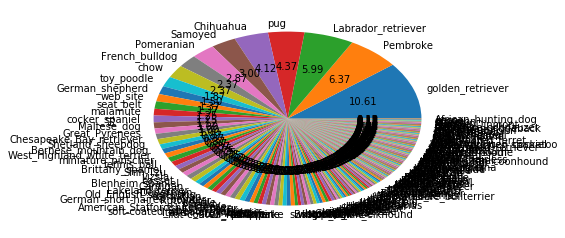

In [137]:
df_merge[df_merge['p1_conf'] > 0.7] ['p1'].value_counts().plot(kind='pie' ,  autopct='%.2f')

##### here we see largest percent is golder_retriever then Pembroke and Labrador_retriever